<a href="https://colab.research.google.com/github/VishnuGupta5883/appliedai/blob/master/Backpropagation_and_Gradient_Checking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>BackPropagation</font>

**There will be some functions that start with the word "grader" ex: grader_sigmoid(), grader_forwardprop(), grader_backprop() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

## <font color='red'>Loading data </font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

with open('/content/drive/My Drive/Colab Notebooks/data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


In [ ]:
data[0]

array([-1.2879095 , -0.12001342, -1.45900038, -0.66660821, -0.14421743,
        1.85884913])

# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>


*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2** 

# <font color='red'>Task 1: Implementing backpropagation and Gradient checking </font>

<font color='blue'><b>Check this video for better understanding of the computational graphs and back propagation</font>

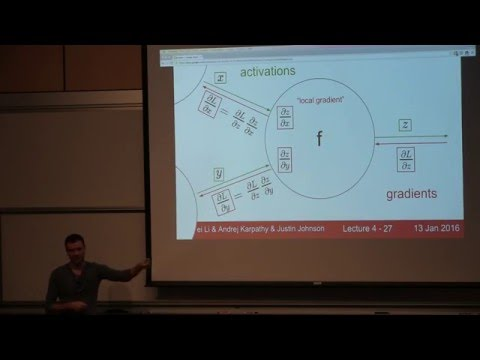

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('i94OvYb6noo',width="1000",height="500")


*  <b>Write two functions<br>
    *  Forward propagation</b>(Write your code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

    <pre>
    <font color='green'>
def forward_propagation(X, y, W):
        <font color='grey'>
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph, <br>         ..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # now compute remaining values from computional graph and get y'
        # write code to compute the value of L=(y-y')^2
        # compute derivative of L  w.r.to Y' and store it in dl
        # Create a dictionary to store all the intermediate values
        # store L, exp,tanh,sig,dl variables
        </font>
        return (dictionary, which you might need to use for back propagation)
        <font color='grey'>
        </font>
</font>
</pre>
    *  <b>Backward propagation</b>(Write your code in<font color='blue'> def backward_propagation()</b></font>)
    </b>
    <pre>
    <font color='green'>
    def backward_propagation(L, W,dictionary):
        <font color='grey'>
        # L: the loss we calculated for the current point
        # dictionary: the outputs of the forward_propagation() function
        # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
        # Hint: you can use dict type to store the required variables 
        # return dW, dW is a dictionary with gradients of all the weights
        </font>
        return dW
        </font>
</font>
</pre>

 ## <font color='red'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

## <Font color='blue'>Gradient checking example</font>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}


## <font color='red'> Implement Gradient checking </font> <br>
 (Write your code in <font color='blue'> def gradient_checking()</font>)

**Algorithm** 



<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []
    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>
<b>NOTE: you can do sanity check by checking all the return values of gradient_checking(),<br> they have to be zero. if not you have bug in your code
</pre></b>

# <font color='red'> Task 2 : Optimizers </font>

* As a part of this task, you will be implementing 3 type of optimizers(methods to update weight)
* Use the same computational graph that was mentioned above to do this task
* Initilze the 9 weights from normal distribution with mean=0 and std=0.01

**Check below video and <a href='https://cs231n.github.io/neural-networks-3/'>this</a> blog**

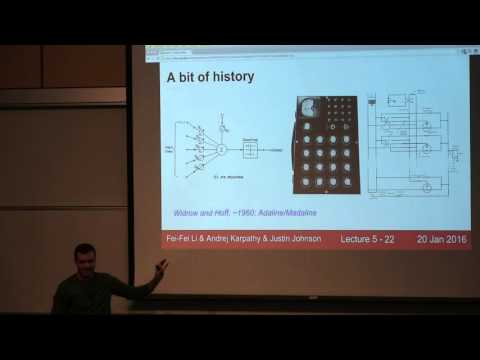

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('gYpoJMlgyXA',width="1000",height="500")

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-100):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  ex: w1 = w1-learning_rate*dw1
</pre>

## <font color='red'> Implement below tasks</b>


*  <b>Task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights<br><br>
*  <b>Task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights<br><br>
*  <b>Task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights


**Note : If you get any assertion error while running grader functions, please print the variables in grader functions and check which variable is returning False .Recheck your logic for that variable .**

<br>
<br>
<br>

# <font color='red'>Task 1 </font>

## <font color='blue'>Forward propagation </font>

In [ ]:
import math
def sigmoid(z):
  '''In this function, we will compute the sigmoid(z)'''
  # we can use this function in forward and backward propagation
  return 1 / (1 + math.exp(-z))
    
def forward_propagation(x, y, w):
  '''In this function, we will compute the forward propagation '''
  # X: input data point, note that in this assignment you are having 5-d data points
  # y: output varible
  # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
  # you have to return the following variables
  # exp= part1 (compute the forward propagation until exp and then store the values in exp)
  # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
  # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
  # now compute remaining values from computional graph and get y'
  # write code to compute the value of L=(y-y')^2
  # compute derivative of L  w.r.to Y' and store it in dl
  # Create a dictionary to store all the intermediate values
  # store L, exp,tanh,sig variables
  #return (dictionary, which you might need to use for back propagation)
  dict ={}
  dict['p1_1'] = x[0] * w[0]
  dict['p1_2'] = x[1] * w[1]
  dict['p1_3'] = dict['p1_1'] + dict['p1_2']
  dict['p1_4'] = dict['p1_3']
  dict['p1_5'] = dict['p1_3'] * dict['p1_4']
  dict['p1_6'] = dict['p1_5'] + w[5] 
  dict['exp']  = np.exp(dict['p1_6'])
  dict['p2_1'] = dict['exp'] + w[6]
  dict['tanh'] = np.tanh(dict['p2_1'])
  dict['p3_1'] = x[2] * w[2]
  dict['p3_2'] = x[3] * w[3]
  dict['p3_3'] = x[4] * w[4]
  dict['p3_4'] = np.sin(dict['p3_1'])
  dict['p3_5'] = dict['p3_2'] + dict['p3_3']
  dict['p3_6'] = dict['p3_4'] * dict['p3_5']
  dict['p3_7'] = dict['p3_6'] + w[7]
  dict['sigmoid'] = sigmoid(dict['p3_7'])
  y_hat = dict['sigmoid'] * w[8] + dict['tanh']
  dict['loss'] = (y -y_hat) **2 
  dict['dl'] = 2 * (y- y_hat) * (-1)
  return dict




<font color='cyan'>Grader function - 1</font>

In [ ]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

<font color='cyan'>Grader function - 2 </font>

In [ ]:
def grader_forwardprop(data):
    dl = (np.round(data['dl'],4)==-1.9285)
    loss=(np.round(data['loss'],4)==0.9298)
    part1=(np.round(data['exp'],4)==1.1273)
    part2=(np.round(data['tanh'],4)==0.8418)
    part3=(np.round(data['sigmoid'],4)==0.5279)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

## <font color='blue'>Backward propagation</font>

In [ ]:
def backward_propagation(x,W,dict):
  '''In this function, we will compute the backward propagation '''
  # L: the loss we calculated for the current point
  # dictionary: the outputs of the forward_propagation() function
  # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
  # Hint: you can use dict type to store the required variables 
  # dw1 = # in dw1 compute derivative of L w.r.to w1
  # dw2 = # in dw2 compute derivative of L w.r.to w2
  # dw3 = # in dw3 compute derivative of L w.r.to w3
  # dw4 = # in dw4 compute derivative of L w.r.to w4
  # dw5 = # in dw5 compute derivative of L w.r.to w5
  # dw6 = # in dw6 compute derivative of L w.r.to w6
  # dw7 = # in dw7 compute derivative of L w.r.to w7
  # dw8 = # in dw8 compute derivative of L w.r.to w8
  # dw9 = # in dw9 compute derivative of L w.r.to w9
  # return dW, dW is a dictionary with gradients of all the weights
  dW = {}
  k  = dict['dl']
  dW['dw9'] = k * dict['sigmoid']
  dW['dw8'] = k * w[8] * (dict['sigmoid'] *(1- dict['sigmoid']))
  dW['dw7'] = k * (1- (dict['tanh']**2))
  dW['dw6'] = k * (1- (dict['tanh']**2)) * dict['exp']
  dW['dw5'] = dW['dw8'] * dict['p3_4'] *x[4]
  dW['dw4'] = dW['dw8'] * dict['p3_4'] *x[3]
  dW['dw3'] = dW['dw8']* ((x[3]*w[3])+(x[4]*w[4])) * np.cos(dict['p3_1'])* x[2]
  dW['dw2'] = dW['dw6'] * 2 *((w[0]*x[0])+(x[1]*w[1]))* x[1]
  dW['dw1'] = dW['dw6'] * 2 *((w[0]*x[0])+(x[1]*w[1]))* x[0]

  return dW

<font color='cyan'>Grader function - 3 </font>

In [ ]:
def grader_backprop(data):
    dw1=(np.round(data['dw1'],8)==-0.22973323)
    dw2=(np.round(data['dw2'],8)==-0.02140761)
    dw3=(np.round(data['dw3'],8)==-0.00562541)
    dw4=(np.round(data['dw4'],8)==-0.00465794)
    dw5=(np.round(data['dw5'],8)==-0.00100772)
    dw6=(np.round(data['dw6'],8)==-0.63347519)
    dw7=(np.round(data['dw7'],8)==-0.56194184)
    dw8=(np.round(data['dw8'],8)==-0.04806288)
    dw9=(np.round(data['dw9'],8)==-1.01810444)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
d1=backward_propagation(X[0],w,d1)
grader_backprop(d1)

True

## <font color='blue'> Implement gradient checking</font>

In [ ]:
def gradient_checking(data, W):
  # compute the L value using forward_propagation()
  X= data[:, :5]
  y = data[:, -1] 
  L = forward_propagation(X[0],y[0],W)
  print("Loss",L['loss'])                      
  # compute the gradients of W using backword_propagation()
  dw = backward_propagation(X[0],W,L)
  print("Gradient",dw)
  approx_gradients = []
  gradient_check = []
  e_0 = 0.0001
  for i in range(9):
    W[i] = W[i] + e_0
    #print(W)
    dl1 = forward_propagation(X[0],y[0],W)
    l1  = dl1['loss']
    W[i] = W[i] - (2*e_0)
    #print(W)
    dl2 = forward_propagation(X[0],y[0],W)
    l2  = dl2['loss']
    dw_approx = (l1-l2)/ (2*e_0)
    approx_gradients.append(dw_approx)
  #print(approx_gradients)
  
  for i in range(9):
    gradient_check.append(approx_gradients[i] - dw['dw' + str(i+1)])
  """
  gradient_check.append(approx_gradients[0] - dw['dw1'])
  gradient_check.append(approx_gradients[1] - dw['dw2'])
  gradient_check.append(approx_gradients[2] - dw['dw3'])
  gradient_check.append(approx_gradients[3] - dw['dw4'])
  gradient_check.append(approx_gradients[4] - dw['dw5'])
  gradient_check.append(approx_gradients[5] - dw['dw6'])
  gradient_check.append(approx_gradients[6] - dw['dw7'])
  gradient_check.append(approx_gradients[7] - dw['dw8'])
  gradient_check.append(approx_gradients[8] - dw['dw9'])
  """
  return gradient_check
 
# initialize weights
W=np.ones(9)*0.1
diff = gradient_checking(data,W)
print(diff)


Loss 0.9298048963072919
Gradient {'dw9': -1.0181044360187037, 'dw8': -0.04806288407316516, 'dw7': -0.561941842854033, 'dw6': -0.6334751873437471, 'dw5': -0.0010077228498574246, 'dw4': -0.004657941222712423, 'dw3': -0.005625405580266319, 'dw2': -0.02140761471775293, 'dw1': -0.22973323498702}
[4.765002142859132e-09, 1.8622573097645118e-05, -7.591536392743958e-08, 4.557630366739361e-06, 9.852254813384666e-07, -3.14725668294491e-05, -0.00017599811356894257, -3.831193749366524e-06, -2.3099298455564465e-05]


# <font color='red'>Task 2: Optimizers

###<font color='blue'>Algorithm with Vanilla update of weights</font>

In [ ]:
#Weight initialization
import numpy as np

W1 = np.random.normal(0,0.01,9)
print(W1)

[ 0.01218038  0.00427173  0.00718199 -0.00781432 -0.00915735  0.01717159
  0.00631457 -0.00528249  0.0040252 ]


In [ ]:
epochs =100
learning_rate = 0.01
vanila_loss =[]
for epoch in range(epochs):
  loss=0
  for i in range(0,506):
    #using the functions forward_propagation() and backword_propagation() compute the gradients of weights
    #update the weigts with help of gradients  ex: w1 = w1-learning_rate*dw1
    l = forward_propagation(X[i],y[i],W1)
    loss+= l['loss']
    dw = backward_propagation(X[i],W1,l)
    key_l = list(dw.keys())
    key_l.reverse()
    #print(type(key_l))
    #print(key_l)
    for i in range(0,9):
      W1[i] = W1[i]- learning_rate * dw[key_l[i]]
  vanila_loss.append(loss)
  print(epoch, loss)
    

0 75.12715290529732
1 14.408271431836496
2 15.045378616262939
3 15.082478688505521
4 15.075979653658885
5 15.065024807921265
6 15.05132486373774
7 15.034571666386524
8 15.01435651279653
9 14.990274034734103
10 14.961929365994527
11 14.928940252941613
12 14.890938976749784
13 14.84757432751871
14 14.798513622231093
15 14.743444743820156
16 14.682078176520532
17 14.614149011464184
18 14.539418895549815
19 14.457677895951141
20 14.368746252255018
21 14.27247598813849
22 14.16875235472546
23 14.057495078298082
24 13.938659385880783
25 13.812236783355399
26 13.678255562190751
27 13.53678101256211
28 13.387915322577689
29 13.23179714549312
30 13.068600819164118
31 12.898535224540748
32 12.721842272732758
33 12.538795013082417
34 12.349695357788368
35 12.154871421993244
36 11.954674481976062
37 11.749475558338554
38 11.539661636072028
39 11.325631539474697
40 11.10779148750355
41 10.886550364893836
42 10.662314757047733
43 10.43548381326107
44 10.206444024533823
45 9.975564030363003
46 9.7431

<font color='blue'>Plot between epochs and loss</font>

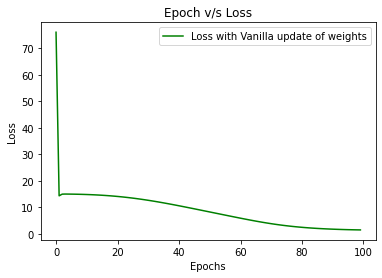

In [ ]:
epoch = range(0,100)
plt.plot(epoch, vanila_loss, 'g', label='Loss with Vanilla update of weights')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch v/s Loss')
plt.legend()
plt.show()

###<font color='blue'>Algorithm with Momentum update of weights</font>

In [ ]:
m = np.zeros(9)
v = np.zeros(9)
epochs =100
learning_rate = 0.01
Moment_loss =[]
for epoch in range(epochs):
  loss=0
  for i in range(0,506):
    #using the functions forward_propagation() and backword_propagation() compute the gradients of weights
    #update the weigts with help of gradients  ex: w1 = w1-learning_rate*dw1
    l = forward_propagation(X[i],y[i],W1)
    loss+= l['loss']
    #loss.append(l['loss'])
    dw = backward_propagation(X[i],W1,l)
    key_l = list(dw.keys())
    key_l.reverse()
    #print(type(key_l))
    #print(key_l)
    for k in range(0,9):
      #W[i] = W[i]- learning_rate * dw[key_l[i]]
      v[k]= (m[k] * v[k]) - (learning_rate * dw[key_l[k]])
      W1[k] += v[k]
  Moment_loss.append(loss)
  print(epoch, loss)

0 76.03668610415917
1 14.404543370710417
2 15.057661855320045
3 15.101913622431498
4 15.100266145916871
5 15.093611441111282
6 15.083791670388267
7 15.070502914312291
8 15.053332204378055
9 15.031869843053933
10 15.005717292123332
11 14.974489492138183
12 14.937816955248243
13 14.895347899853185
14 14.84675041897089
15 14.791714657791955
16 14.729954973756229
17 14.661212051363313
18 14.585254943118551
19 14.50188300749504
20 14.410927714574806
21 14.31225429011882
22 14.205763169214908
23 14.091391231349451
24 13.969112789747212
25 13.838940309097781
26 13.700924827329139
27 13.55515605888043
28 13.401762158942262
29 13.2409091303695
30 13.072799857412287
31 12.897672753057018
32 12.715800009646516
33 12.527485445581423
34 12.333061944378027
35 12.13288848626234
36 11.92734677697858
37 11.716837483783339
38 11.50177609496484
39 11.282588427023333
40 11.059705813328538
41 10.833560020201821
42 10.604577951664501
43 10.373176223413134
44 10.139755710940891
45 9.90469620722849
46 9.66835

<font color='blue'>Plot between epochs and loss</font>

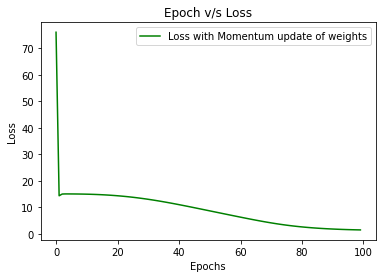

In [ ]:
epoch = range(0,100)
plt.plot(epoch, Moment_loss, 'g', label='Loss with Momentum update of weights')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch v/s Loss')
plt.legend()
plt.show()

###<font color='blue'>Algorithm with Adam update of weights</font>

In [ ]:
m = np.zeros(9)
v = np.zeros(9)
beta_1 = .9
beta_2 = .99
epsilon =0.0001
epochs =100
learning_rate = .01
Adam_loss =[]
for epoch in range(epochs):
  loss=0
  for i in range(0,506):
    #using the functions forward_propagation() and backword_propagation() compute the gradients of weights
    #update the weigts with help of gradients  ex: w1 = w1-learning_rate*dw1
    l = forward_propagation(X[i],y[i],W1)
    loss+= l['loss']
    #print(loss)
    dw = backward_propagation(X[i],W1,l)
    for k in range(9):
      m[k] = beta_1 * m[k] + (1-beta_1)* dw[key_l[k]]
      #v[k] = beta_2 * v[k] + (1-beta_2)* dw[key_l[k]]
      v[k] = beta_2 * v[k] + (1-beta_2)* dw[key_l[k]] * dw[key_l[k]]
      #m_hat =  m[k] / (1-beta_1**(k+1))
      #v_hat =  v[k] / (1-beta_2**(k+1))
      #print(m[k], v[k])
      W1[k] = W1[k] - ((learning_rate* m[k])/(np.sqrt(v[k]) + epsilon))
      #W[k]-= learning_rate* m_hat/(np.sqrt(v_hat) + epsilon)
  Adam_loss.append(loss)   
  print(epoch, loss)


0 19.910027630154918
1 0.09063580657144188
2 0.028844609048480133
3 0.004652866193231115
4 0.024787171117877645
5 0.012250870566632557
6 0.012501302304277973
7 0.020544937619641743
8 0.0076772888052514705
9 0.02125453817709259
10 0.009930934895004346
11 0.0021115902696317496
12 0.013386233041463847
13 0.014323176007637108
14 0.015284965270701185
15 0.003346498325689266
16 0.005374320248876973
17 0.01590106342013898
18 0.008923591079097772
19 0.009115743778272139
20 0.0018051760990339574
21 0.00214435414803324
22 0.006527751140683513
23 0.0021900648665815125
24 0.005727727280151287
25 0.021009295358870684
26 0.012005007804141125
27 0.012787445813314242
28 0.01916981182699033
29 0.008853403132268506
30 0.01363019495860745
31 0.0023073738919109866
32 0.003827234728256789
33 0.017301408257678216
34 0.0037334929743797563
35 0.001081361790830154
36 0.011440743395112682
37 0.00789372790460075
38 0.0049186619845685885
39 0.017275735926690124
40 0.012387022546004666
41 0.005723524389735547
42 0

<font color='blue'>Plot between epochs and loss</font>

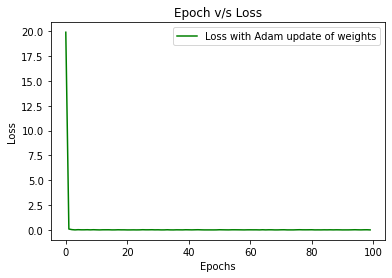

In [ ]:
epoch = range(0,100)
plt.plot(epoch, Adam_loss, 'g', label='Loss with Adam update of weights')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch v/s Loss')
plt.legend()
plt.show()

<font color='blue'>Comparision plot between epochs and loss with different optimizers</font>

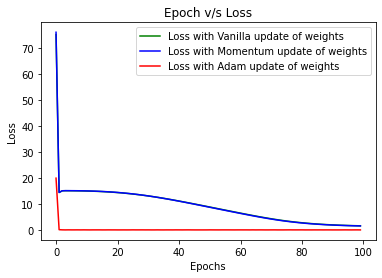

In [ ]:
epoch = range(0,100)
plt.plot(epoch, vanila_loss, 'g', label='Loss with Vanilla update of weights')
plt.plot(epoch, Moment_loss, 'b', label='Loss with Momentum update of weights')
plt.plot(epoch, Adam_loss, 'r', label='Loss with Adam update of weights')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch v/s Loss')
plt.legend()
plt.show()

# Observations

### 1. Vanilla update- Loss is decresing after every epoch. From epoch-1 to epoch -2 loss is decreasing significantly. After it decresing bit slowly.

### 2 Momentum update -Loss is decresing after every epoch. From epoch-1 to epoch -2 loss is decreasing significantly. After it decresing bit slowly.It is almost same as Vanilla update

### 3 Adam update :Loss is decreasing very sharply and sigfincatly better than Momentum and Vanilla update. Loss is minimum in Adam. So Adam optimization is best optimiser.